# Intro
This is a walkthrough the proof that group inverses are unique.

In [90]:
include("/Users/ksb/Catlab.jl/test/atp/ATP.jl"); # Where the wiring diagrams are defined
using Catlab.Graphics: to_graphviz, Graphviz, LeftToRight

show_diagram(d::WiringDiagram; 
             w::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             i::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             o::Union{Vector{Pair{Int, String}}, Vector{String}}=String[]) = to_graphviz(
  label(d;w=w,i=i,o=o), orientation=LeftToRight, labels=true, label_attr=:xlabel,
  node_attrs=Graphviz.Attributes(:fontname => "Courier"), 
  edge_attrs=Graphviz.Attributes(:fontname => "Courier"))

function show_diagram(d::ACSet;
             w::Union{Vector{Pair{Int, String}}, Vector{String}}=String[],
             i::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             o::Union{Vector{Pair{Int, String}}, Vector{String}}=String[])
  show_diagram(cospan_to_wd(d); w=w,i=i,o=o)
end;

From apply rewrites to this diagram:

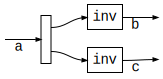

In [80]:
show_diagram(uniq_inv.l, i=["a"],o=["b","c"])

We want to create something that this diagram is homomorphic to.

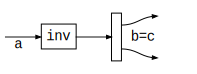

In [81]:
show_diagram(uniq_inv.r,i=["a"],w=["\t b=c"])

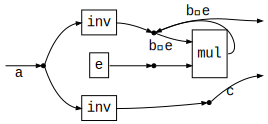

In [82]:
# replace b with b*e
ui = wd_to_cospan(uniq_inv.l, T_group.gens)[2] # initial state
ui2 = apply_eq(ui, T_group, :rightid; forward=false, V=[1=>2])
show_diagram(ui2, i=["a"], o=["b⋅e","c"]) 

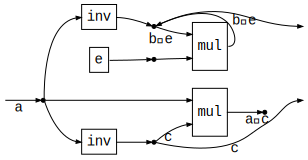

In [83]:
# construct a⋅c
ui3 = apply_eq(ui2, T_group, :mul; V=[1=>3,2=>4]); 
show_diagram(ui3,w=[6=>"a⋅c"],i=["a"],o=["c","b⋅e"]) 

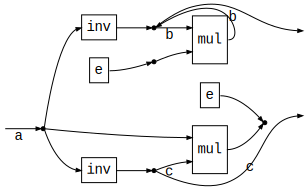

In [84]:
# a*c = e
ui4 = apply_eq(ui3, T_group, :rightinv)
show_diagram(cospan_to_wd(ui4), i=["a"],o=["c","b"]) 

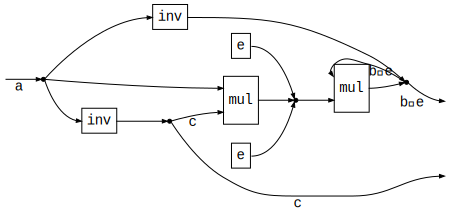

In [85]:
# the e's are the same
ui5 = apply_eq(ui4, add_eq(T_group, e_uniq), :e_uniq, repl=true, V=[1=>3,2=>5])
show_diagram(ui5,i=["a"],o=["c","b⋅e"]) 

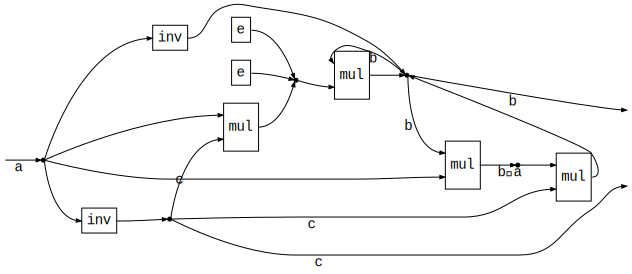

In [86]:
# reassociate b(ac) to (ba)c
ui6 = apply_eq(ui5, T_group, :assoc, forward=false, V=[5=>1])
show_diagram(ui6,w=[17=>"b⋅a"], i=["a"],o=["b","c"]) 

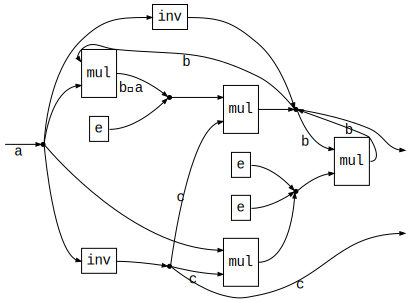

In [87]:
# ba = e
ui7 = apply_eq(ui6, T_group, :leftinv, V=[2=>5])
show_diagram(ui7, w=[10=>"b⋅a"], i=["a"],o=["b","c"]) 

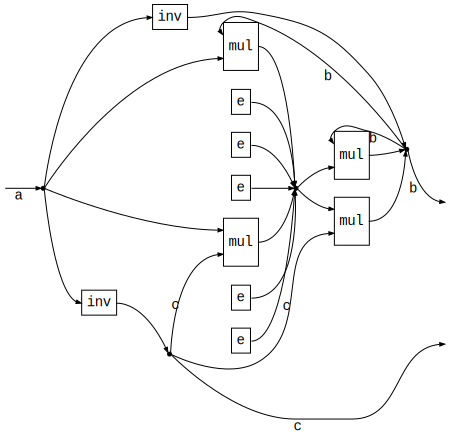

In [88]:
# the e's are the same
ui8 = apply_eq(ui7, add_eq(T_group, e_uniq), :e_uniq, V=[1=>3,2=>5], E_0_1=[2=>3])
show_diagram(ui8, i=["a"],o=["b","c"]) 

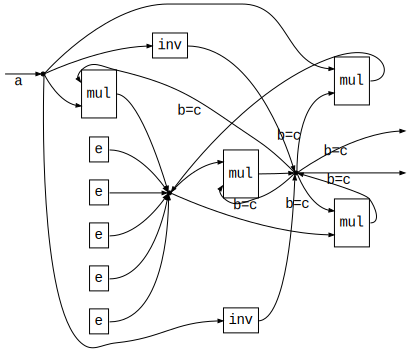

In [89]:
# the e's are the same, so we have e*c = b
ui9 = apply_eq(ui8, T_group, :leftid, V=[1=>4,3=>1], E_0_1=[1=>1])
goal = wd_to_cospan(uniq_inv.r, T_group.gens)[2]
@assert is_homomorphic(goal, ui9)
show_diagram(ui9, i=["a"],o=[2=>"b=c"]) 

So a total of 8 steps, assuming we have the uniqueness of `e` as a lemma on hand.